In [ ]:
!pip install plotly

In [151]:
#라이브러리 호출
import pandas as pd #데이터를 처리하고 불러오는 함수를 사용할 라이브러리
import numpy as np #데이터의 수학/통계 연산을 수행할 라이브러리
import plotly.express as px #동적 시각화
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [153]:
df1=pd.read_csv('/content/drive/MyDrive/DSA/Data_process.csv.csv')

In [154]:
df1

,Unnamed: 0,순번,생산라인코드,생산라인명,생산일자,품목코드,품목명,작업장코드,충전실온도,실링온도,쿠킹온도,쿠킹스팀압력,실링압력,생산시간
0,0,3,C001,쿠커 #1,2011-01-03,23K01312,서비스면양념장(재),W003,71.669853,96.769853,131.742003,23.315,201.844,70.37
1,1,1,C002,쿠커 #2,2011-01-03,23V00019,고구마샐러드믹스베이스(재),W003,70.386480,102.086480,136.926080,23.226,212.043,70.83
2,2,13,C003,쿠커 #3,2011-01-03,1.#JE+00,이마트가쓰오다시국물(재),W003,71.206130,112.306130,147.579680,23.516,208.781,73.55
3,3,7,C005,2동 쿠커 #4,2011-01-03,26A01006,고구마샐러드바145g(재),W003,70.430565,96.030565,131.569165,23.692,208.269,74.81
4,4,2,C007,프리머 #1,2011-01-03,26B06024,이츠웰골드마요네즈1kg(재),W003,72.179319,114.079318,149.928068,23.899,211.625,73.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22904,24059,3,D087,냉동밥 내포장#2,2021-10-28,1BA03638,(1)Homeplus signature 날치알이톡톡터지는날치알밥(알밥),W005,71.288798,102.688798,138.091898,23.602,206.561,72.49
22905,24062,9,D088,냉동밥 내포장#1,2021-10-29,1BA03515,(쿠팡)곰곰갈비맛치킨밥,W005,69.732381,98.432381,133.916831,23.656,213.413,76.63
22906,24063,10,D088,냉동밥 내포장#1,2021-10-29,1BA03612,무명식당뿌리채소영양밥3kg,W005,71.459932,107.559932,143.598182,24.026,215.243,81.00
22907,24067,4,D088,냉동밥 내포장#1,2021-10-29,1BA03606,콩콩푸드밥3kg,W005,70.664452,65.764452,100.773102,23.339,209.513,72.12


In [155]:
#쿠킹 스팀 압력겂을 넣었을때,"실링압력"어떻게 될 지 예측하는 수식을 생성
#Y(실링압력)-mX(쿠킹스팀압력)+b
#최소제곱법+경사하강법 두기법을 활용해 수식을 생성
#수식 생성 절차
#1.파라미터(m,p/회귀계수 및 절편)를 임의의 값으로 설정(초기화),첫 RSS계싼
#2.기존 파라미터(m,b/회귀계스 및 절편)의 값을 업데이트, 다시 RSS계산
#3.Rss감소했다면, 다시 2번 절차를 반복, RSS가 감소하지 않는다면, 파라미터를 확장하고 업데이트 를 중단

In [156]:
px.scatter  (df1, x="쿠킹스팀압력", y="실링압력")

In [ ]:
#3가지 함수를 구성
#1.parmater를 update하는 함수
#2.점진적 반복 계산을 수행할 함수
#3.RSS오차항(실제값과예측값 차이)를 계산하는 함수

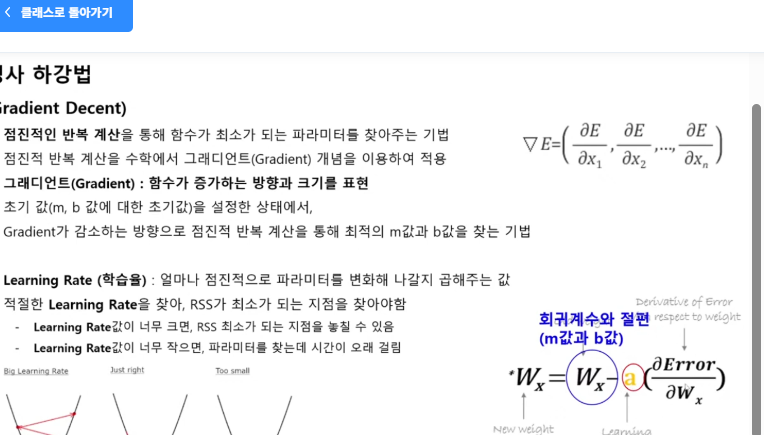

In [157]:
#1. Parameter를 계산하고 update를 하는 함수
def parmater_update(m,b,X,Y,learning_rate):
  #m값과b값의 update값을 0값으로 초기화(np.zeros_like->초기화)
  m_param=np.zeros_like(m)
  b_param=np.zeros_like(b)
  #Y=m X+b값을 계산(no.dot->행렬형태)
  Y=np.dot(X,m.T)+b

  #잔차 실제값과 예측값 차이 Resiodual
  residual=Y-Y_pred

  #행렬형태로 계산하기 위해
  #b_param값을 행렬형태로 연산하여 구하기 위해 1로만 구성된 행렬을 생성
  b_frame=np.ones(len(y),1)

  #파라미터(m값과 b값/회귀걔수를 업데이트)
  m_param=-(2/len(Y))*learning_rate*(np.dot(X.T,residual))
  #파라미터(m값과 b값/회귀걔수)를 변화량을 계산
  b_param=-(2/len(Y))*learning_rate*(np.dot(b_frame.T,residual))


  return m_param.b_param



In [158]:
#2.점진적 반복 계산을 수행할 함수
def gradient_step(X,Y,iters):
  #m값과b값을 0으로 초기화
  m=np.zeros((1,1))
  b=np.zeros((1,1))
  #ifers(반복 횟수)만큼 parameter_update절차를 거쳐, update를 수행
  for i in range(iters):
    m_param,b_param=parmater_update(m,b,X,Y,learning_rate)
    m=m-m_param
    b=b-b_param
  return m,b #회귀계수와 절편값

In [159]:
# 3번  RSS오차항 (실제값과예측값의 차이)의 계산하는 함수
import numpy as np

def gradient_step(X, Y, learning_rate):
    # 초기화
    m = 0.0  # 기울기
    b = 0.0  # 절편
    n = len(Y)  # 데이터 수

    for _ in range(100):  # 100번 반복
        # 예측값 계산
        Y_pred = m * X + b

        # 기울기와 절편 계산
        md = (-2/n) * np.sum(X * (Y - Y_pred))  # 기울기 변화량
        bd = (-2/n) * np.sum(Y - Y_pred)  # 절편 변화량

        # 매개변수 업데이트
        m -= learning_rate * md
        b -= learning_rate * bd

    return m, b

def get_residual(Y_pred, Y):
    result = np.sum(np.square(Y - Y_pred)) / len(Y)
    return result


# 예시 사용
X = df1['쿠킹스팀압력'].values.reshape(-1, 1)  # 독립 변수
Y = df1['실링압력'].values.reshape(-1, 1)  # 종속 변수
learning_rate = 0.01  # 학습률

m, b = gradient_step(X, Y, learning_rate)


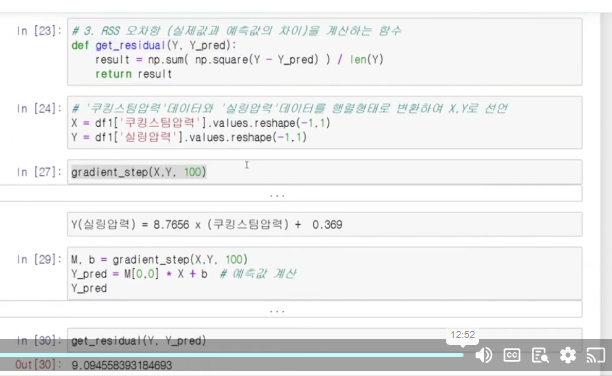

In [160]:
Y_pred = m * X + b  # 예측값을 계산
residual = get_residual(Y,Y_pred)  # RRS 오차항 계산


In [18]:
#확륙적 경사하강법

#경사하강법은 모든 데이터에 대해 반복적으로 비용함수를 계산
#경사하강법은 데이터가 많이 질수록 시간이 오래걸리는 특징이 있음
#전체데이터가 아닌 일부데이터만 추출해, 파라미터(회귀계수,절편)을 업데이트
# Batch:랜덤하게dpdate에 사용할 데이터를 추출

In [161]:
gradient_step(X,Y,1000)
#interation:업데이트를 수행하는 반복횟수가 늘어가기에
#파라미터를 계산하는 시간이 오래걸린다

/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning:

overflow encountered in reduce

<ipython-input-159-899930f49338>:19: RuntimeWarning:

invalid value encountered in scalar subtract

<ipython-input-159-899930f49338>:20: RuntimeWarning:

invalid value encountered in scalar subtract



(nan, nan)

In [162]:
X.shape #이제 여기 랜덤하게 추출해서 학습


(22909, 1)

In [75]:
X.shape[0] #행계수

22909

In [163]:
np.random.permutation(X.shape[0]) #데이터를 순서를 섞어 나열

array([10624,  1770, 22736, ...,  1943, 14484, 18853])

In [164]:
X[10]

array([23.456])

In [165]:
def stochastio_gradient_step(X,Y,batch,liters):
  #회귀계수값을 0값으로 초기화하여 세팅
  m=np.zeros((1,1))
  b=np.zeros((1,1))

  for i in range(iters):
    #전체데이터에서 랜덤하게Batch사이즈 만큼 데이터를 추출하여 파라미터를 최적화
    random_index=np.rendom.permutation(X.shape[0 ]) #행계수
    #앞서 섞은 난수를 이용해 원하는 량(batch)의 random 데이터를 추출
    X_sample=X[random_index[0,batch]]
    Y_sample=Y[random_index[0,batch]]

    m_update_param,b_update_param=paramter_update(m,b,X_sample,Y_sample,0.001)

    m=m-m_update_param
    b=b-b_update_param
  return m,b
  # 함수 호출 예시
  M, b = stochastic_gradient_step(X, Y, 1000, 10000)

  Y_pred=M[0,0]*X+b

  ger_residual(Y,Y_pred)

#기계학습 라이브러리를 이용해 계산-집중해


In [166]:
from sklearn.linear_model import LinearRegression #선형회귀

In [167]:
model=LinearRegression() #모델생성
model.fit(X,Y) #데이터를 이용해 최적의 파라미터 도출
#학습끝남 (LinearRegression선형기법이 확률적 경사하강법,경사하강법,최소제곱법 등 모두 학습함)

LinearRegression()

In [168]:
model.coef_ #회귀계수

array([[8.65268943]])

In [104]:
model.intercept_ #Y절편값

array([3.0487596])

In [169]:
model.predict(X) #예측값 계산

array([[204.78621373],
       [204.01612437],
       [206.52540431],
       ...,
       [210.93827592],
       [204.99387828],
       [205.140974  ]])

In [170]:
get_residyal(Y,Y_pred) #오차항 값계산

2.533976836324278e+211

In [171]:
px.scatter(df1,x='쿠킹스팀압력',y='실링압력',trendline='ols') #회귀선까지


#회귀(Regression)
특정객체의 값이 집단의 평균과 같은 일정한 값으로 돌아가는 경향
여러개의 설명변수x와 한의 목표변수Y간 상관관계를 모델링하는 기법들의 통칭
목표변수->연속형(숫자)
가장 큰 핵심은 적절한 회귀계수를 찾는 것이 목표

회귀분석의 종류
일반선형회귀:예측값과 실제값 RSS를 최소화 할 수 있는 방향으로 회귀계수를 최적화

규제 선형회귀:overftting 과적합 현상이 발생을 방지하고 적절한 회귀계수를 도출해내는 기법

-Ridge

-Less0

-Elastic Net

다중회귀 분석

여러개의 설명변수를 이용해 하나의 목표변수를 예측

'다중공선성' 을 고려하여 모델을 구성해야함

다중공선성:설명변수간의 상관관꼐가 높이 발생하는 문제, 설명변수간 관계가 강한 변수들이 모델을 만들 때,통제할 수 없는 오차가 발생

해결방법:분산 팽창 지수 vif을 이용해 다중공선성에 문제가 발생 10이상일때 문제있다고 판단-규제화를 통해 회귀모델 구성

( 결측치 제거하면 됨)

In [172]:
#공정데이터를 입력햇을때,생산시간을 예측하는 모델 구성
df2=df1[['충전실온도','실링온도','쿠킹온도','쿠킹스팀압력','실링압력','생산시간']]
#상관계수:두변수 간의 상관성을 -1(음의상관)~+1(양의 상관표현한 수치 /0은 무상관
df2.corr() #상관계수 파악 corrleation

,충전실온도,실링온도,쿠킹온도,쿠킹스팀압력,실링압력,생산시간
충전실온도,1.000000,-0.001409,0.007949,0.335636,0.185599,0.085330
실링온도,-0.001409,1.000000,0.999612,-0.031155,-0.017177,-0.000891
쿠킹온도,0.007949,0.999612,1.000000,-0.003286,-0.001733,0.006244
쿠킹스팀압력,0.335636,-0.031155,-0.003286,1.000000,0.554146,0.255895
실링압력,0.185599,-0.017177,-0.001733,0.554146,1.000000,0.146449
생산시간,0.085330,-0.000891,0.006244,0.255895,0.146449,1.000000


In [173]:
X=df1[['충전실온도','실링온도','쿠킹온도','쿠킹스팀압력','실링압력']] #을 넣었을때
Y=df1[["생산시간"]] #생산시간을 예측하는

In [174]:
X

,충전실온도,실링온도,쿠킹온도,쿠킹스팀압력,실링압력
0,71.669853,96.769853,131.742003,23.315,201.844
1,70.386480,102.086480,136.926080,23.226,212.043
2,71.206130,112.306130,147.579680,23.516,208.781
3,70.430565,96.030565,131.569165,23.692,208.269
4,72.179319,114.079318,149.928068,23.899,211.625
...,...,...,...,...,...
22904,71.288798,102.688798,138.091898,23.602,206.561
22905,69.732381,98.432381,133.916831,23.656,213.413
22906,71.459932,107.559932,143.598182,24.026,215.243
22907,70.664452,65.764452,100.773102,23.339,209.513


In [115]:
Y

,생산시간
0,70.37
1,70.83
2,73.55
3,74.81
4,73.40
...,...
22904,72.49
22905,76.63
22906,81.00
22907,72.12


In [175]:
model=LinearRegression()
model.fit(X,Y) #파리미터(회귀계수와 Y절편값)

LinearRegression()

In [176]:
model.coef_ #회귀계수값

array([[-2.37692067e-03,  2.15217341e+01, -2.15201959e+01,
         3.52152897e+01,  4.97683395e-03]])

In [119]:
model.intercept_ #y절편

array([5.02243944])

In [177]:
model.predict(X) #예측값 계산 오차

array([[74.44244559],
       [74.22277409],
       [75.09405664],
       ...,
       [76.62161686],
       [74.49498884],
       [74.59907993]])

In [178]:
get_residyal(Y,Y_pred) #오차항 계산 실제 값과 예측값

/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning:

The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)



,0
생산시간,2.533977e+211


In [179]:
#분산팽창지수(VIF) 계산하지말고 라이브러리 불러오면됨
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [123]:
X

,충전실온도,실링온도,쿠킹온도,쿠킹스팀압력,실링압력
0,71.669853,96.769853,131.742003,23.315,201.844
1,70.386480,102.086480,136.926080,23.226,212.043
2,71.206130,112.306130,147.579680,23.516,208.781
3,70.430565,96.030565,131.569165,23.692,208.269
4,72.179319,114.079318,149.928068,23.899,211.625
...,...,...,...,...,...
22904,71.288798,102.688798,138.091898,23.602,206.561
22905,69.732381,98.432381,133.916831,23.656,213.413
22906,71.459932,107.559932,143.598182,24.026,215.243
22907,70.664452,65.764452,100.773102,23.339,209.513


In [180]:
data_VIF=pd.DataFrame() # 새로운 하나의 데이터 플레임 구성
X['C']=1 #VIF값을 각항목들의 scale에 맞취 계산하기 위해 삽입한값
data_VIF["변수명"]=X.columns #X의 항목명을 data_VIF데이터에 선언
data_VIF["VIF"]=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

<ipython-input-180-0b4566e5f175>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [181]:
data_VIF

,변수명,VIF
0,충전실온도,1.127343e+00
1,실링온도,8.144416e+08
2,쿠킹온도,8.136599e+08
3,쿠킹스팀압력,6.326813e+05
4,실링압력,1.443179e+00
5,C,1.331599e+04


#규제 선형회귀 모델
-규제:Aiphe값으로 패널티를 부여해 회귀계수의 값의 크기를 의도적으로 감소시켜

overfitting현상을 포함한 회귀 분석의 문제점을 보완해줄 수 있음

L1규제:weight 값 (가중치)에 절대값을 부여한 패널티

L2규제:weight 값 (가중치)에 제곱을 계산한 패널티

-RSS최소화를 고려하면서,회귀계수값의 크기를 적절히 통제
->적절한 model도출

-Alpha값을 크게 하면,RSS오차항의 회귀계수를 작게 overfit방지

-Alpha값을 작게하면, 회귀계수값이 커져 성능이 높아짐

#규제선형회귀 종류
-Lasso:선형회귀에 L1규제를 추가한 모델
예측 영향력이 적은 (획귀계수값이 작은)설명변수드링 회구기계수값을 0으로 만들어
회귀모델을 구성할떄,설명변수를 제외(변수선택법)



-Ridge:선형회귀에 L2규제를 추가한 모델

-상대적은 큰 회귀 계수값을 통제하여,회귀계수 값을 작게 구성

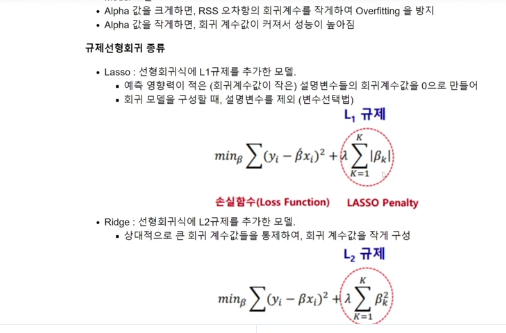

-Elastic Net:L1규제와 L2규제 함께 결합하여, L1규제로 예측영향력이
적은 설명변수를 제거, L2규제를 이용해 회귀계수값이 너무 큰 설명변수는 작은 회귀계수값으로
계산되도록 통제

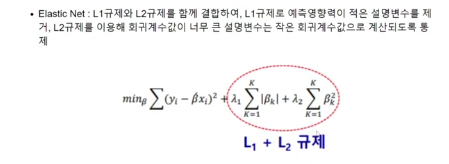

In [183]:
#Lasso랏쏘
from sklearn.linear_model import Lasso
model=Lasso() #여기는 alpha가 기본 1로 되어있음
model.fit(X,Y)
model.coef_ #(회귀계수값)규제항에 람다값이 회귀계수에 영향력이 적은 것을 아예 날려버림->
#람다값 조정해줘서 학습률이 다 날아가지않도록해줘야함

array([ 0.        , -0.        ,  0.        ,  0.        ,  0.03275009,
        0.        ])

In [184]:
model.intercept_ #Y절편

array([68.86158201])

In [191]:
print(type(Y), type(Y_pred)) #오차항계산할때 타입비교
#Y는 pandas의 DataFrame이고, Y_pred는 numpy의 ndarray인 경우,
# 두 데이터 형식이 맞지 않아 발생하는 오류입니다. 이 문제를 해결하기 위해
#Y를 numpy 배열로 변환하거나, Y_pred를 pandas Series로 변환할 수 있습니다.


<class 'pandas.core.frame.DataFrame'> <class 'numpy.ndarray'>


In [192]:
# 예측값 계산 후 잔차 계산
Y_pred = model.predict(X)  # 모델을 사용하여 예측값 생성
residual = get_residual(Y.values.flatten(), Y_pred)  # Y를 numpy 배열로 변환하여 잔차 계산

# 잔차 출력
print(residual)


7.183486790402948


In [ ]:
#규제항에 곱해져 있는 람다값을 사용자가 통제하여
#알파값이 클수록 회귀계수값이 작아진다
#알파값이 작으면 회귀계수 증가

In [194]:
model=Lasso(alpha=0.01) #alpha를 1->0.01로 줄임->회귀계수 증가 (회귀계수 많이 안날라감)

Lasso(alpha=0.01)

In [195]:
model.coef_#많이 안날라감

array([ 1.51038133e-03, -0.00000000e+00,  1.45315424e-03,  2.66912993e+00,
        1.34015190e-02,  0.00000000e+00])

In [196]:
model.intercept_

array([9.25405466])

In [198]:
print(type(Y), type(Y_pred))
#Y는 pandas의 DataFrame이고, Y_pred는 numpy의 ndarray인 경우,
# 두 데이터 형식이 맞지 않아 발생하는 오류입니다. 이 문제를 해결하기 위해
#Y를 numpy 배열로 변환하거나, Y_pred를 pandas Series로 변환할 수 있습니다.


<class 'pandas.core.frame.DataFrame'> <class 'numpy.ndarray'>


In [199]:

#랏소가 1일때 7.183486790402948-> 랏소가 0.01일때 6.789379177503581

6.789379177503581


In [200]:
#Ridge(L2) 회귀계수 과정합 방지
from sklearn.linear_model import Ridge

In [201]:
model=Ridge()
model.fit(X,Y)

Ridge()

In [202]:
model.coef_ #회귀계수

array([-0.00206473, -1.01068189,  1.01221235,  1.41445719,  0.00504604,
        0.        ])

In [203]:
model.intercept_ #y절편

array([5.03950884])

In [ ]:
#모델평가

In [204]:
print(type(Y), type(Y_pred))
#Y는 pandas의 DataFrame이고, Y_pred는 numpy의 ndarray인 경우,
# 두 데이터 형식이 맞지 않아 발생하는 오류입니다. 이 문제를 해결하기 위해
#Y를 numpy 배열로 변환하거나, Y_pred를 pandas Series로 변환할 수 있습니다.

<class 'pandas.core.frame.DataFrame'> <class 'numpy.ndarray'>


In [205]:
# 예측값 계산 후 잔차 계산
Y_pred = model.predict(X)  # 모델을 사용하여 예측값 생성
residual = get_residual(Y.values.flatten(), Y_pred)  # Y를 numpy 배열로 변환하여 잔차 계산

# 잔차 출력
print(residual)


6.786876806768894


In [207]:
#-Elastic Net(L1규제+L2규제) 함께 결합
from sklearn.linear_model import ElasticNet


In [214]:
model=ElasticNet(alpha=0.01) #알파넣어서 기본 1->0.01으로 줄여서 회귀계수 증가시킴
model.fit(X,Y)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.253e+04, tolerance: 1.664e+01



ElasticNet(alpha=0.01)

In [215]:
 ElasticNet()

ElasticNet()

In [216]:
model.coef_ #회귀계수 너무많이 없어짐

array([ 0.02158385, -0.09513338,  0.09659536,  2.31987995,  0.02022349,
        0.        ])

In [213]:
model.intercept_ #y절편

array([61.46536974])

In [ ]:
print(type(Y), type(Y_pred))
#Y는 pandas의 DataFrame이고, Y_pred는 numpy의 ndarray인 경우,
# 두 데이터 형식이 맞지 않아 발생하는 오류입니다. 이 문제를 해결하기 위해
#Y를 numpy 배열로 변환하거나, Y_pred를 pandas Series로 변환할 수 있습니다.

In [217]:
# 예측값 계산 후 잔차 계산
Y_pred = model.predict(X)  # 모델을 사용하여 예측값 생성
residual = get_residual(Y.values.flatten(), Y_pred)  # Y를 numpy 배열로 변환하여 잔차 계산

# 잔차 출력
print(residual)


6.794467353025154
